In [16]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import h5py
import scipy

%matplotlib inline

In [17]:
# our dataset contains images of cats(labelled as 1) and non-cats(labeled as 0) 
def load_dataset():
    train_dataset = h5py.File('/home/devcontainers/Deep_Learning/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('/home/devcontainers/Deep_Learning/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


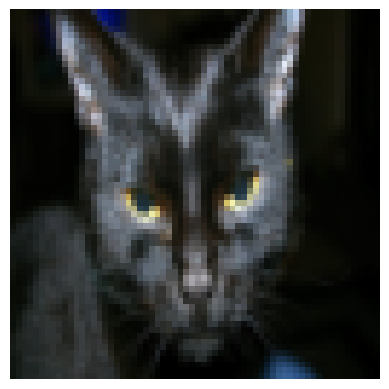

In [18]:
# load the dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# how our dataset looks like
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

# Example of a cat
index = 25
plt.imshow(train_set_x_orig[index])
plt.axis('off')
plt.show()

In [19]:
train_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_set_y.shape))

# Normalizing our data
train_x = train_x / 255.
test_x = test_x / 255.

train_x shape: (12288, 209)
train_y shape: (1, 209)


In [20]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize_parameters(dim):
    w = np.random.randn(dim, 1) * 0.01
    b = 0
    
    return w, b

def propagate(X, Y, w, b):
    m = X.shape[1]
    
    # forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # backward propagation
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    
    return grads, cost

Cost after iteration 0: 0.752110
Cost after iteration 100: 0.587256
Cost after iteration 200: 0.468173
Cost after iteration 300: 0.376382
Cost after iteration 400: 0.331923
Cost after iteration 500: 0.303635
Cost after iteration 600: 0.280167
Cost after iteration 700: 0.260267
Cost after iteration 800: 0.243113
Cost after iteration 900: 0.228131
Cost after iteration 1000: 0.214908
Cost after iteration 1100: 0.203134
Cost after iteration 1200: 0.192572
Cost after iteration 1300: 0.183038
Cost after iteration 1400: 0.174384
Cost after iteration 1500: 0.166490
Cost after iteration 1600: 0.159260
Cost after iteration 1700: 0.152612
Cost after iteration 1800: 0.146479
Cost after iteration 1900: 0.140801
train accuracy: 99.04306220095694 %
test accuracy: 72.0 %
f1 score train: 0.9861111111111112
f1 score test: 0.7741935483870968


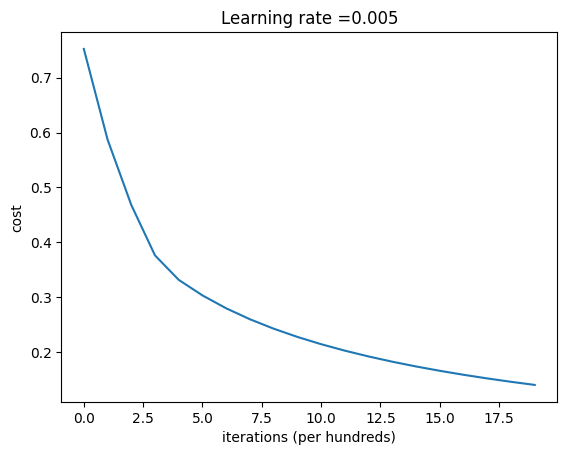

In [22]:
def optimize(X, Y, w, b, iters, alpha, print_cost = False):
    costs = []
    for i in range(iters):
        grads, cost = propagate(X, Y, w, b)
        w -= alpha * grads["dw"]
        b -= alpha * grads["db"]
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": grads["dw"], "db": grads["db"]}
    
    return params, grads, costs

def predict(X, w, b):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
            
    return Y_pred

def model(X_train, Y_train, X_test, Y_test, iters = 2000, alpha = 0.5, print_cost = False):
    w, b = initialize_parameters(X_train.shape[0])
    parameters, grads, costs = optimize(X_train, Y_train, w, b, iters, alpha, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_train_pred = predict(X_train, w, b)
    Y_test_pred = predict(X_test, w, b)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_pred - Y_test)) * 100))
    print("f1 score train: {}".format(f1_score(Y_train.flatten(), Y_train_pred.flatten())))
    print("f1 score test: {}".format(f1_score(Y_test.flatten(), Y_test_pred.flatten())))
    d = {"costs": costs, "Y_prediction_test": Y_test_pred, "Y_prediction_train": Y_train_pred, "w": w, "b": b, "learning_rate": alpha, "num_iterations": iters}
    
    return d

# training the model
d = model(train_x, train_set_y, test_x, test_set_y, iters = 2000, alpha = 0.005, print_cost = True)

# plotting the cost function
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
